In [1]:
import pandas as pd

# Load the dataset
file_path = 'retail_sales.xlsx'
df = pd.read_excel('/kaggle/input/retails-sales-data/Retails Sales Data.xlsx')

# Display the first few rows of the dataframe
print("Data preview:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Drop rows with missing values or fill them as needed
df = df.dropna()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Ensure correct data types
df['Store_ID'] = df['Store_ID'].astype(int)
df['Product_ID'] = df['Product_ID'].astype(int)
df['Quantity_Sold'] = df['Quantity_Sold'].astype(int)
df['Unit_Price'] = df['Unit_Price'].astype(float)
df['Total_Sales'] = df['Total_Sales'].astype(float)
df['Customer_Age'] = df['Customer_Age'].astype(int)
df['Customer_Gender'] = df['Customer_Gender'].astype('category')
df['Payment_Method'] = df['Payment_Method'].astype('category')

Data preview:
        Date  Store_ID  Product_ID Product_Category  Quantity_Sold  \
0 2024-01-01         1         101      Electronics              2   
1 2024-01-01         1         102         Clothing              3   
2 2024-01-02         2         103        Groceries              5   
3 2024-01-02         2         104      Electronics              1   
4 2024-01-03         1         105         Clothing              4   

   Unit_Price  Total_Sales  Customer_Age Customer_Gender Payment_Method  
0         500         1000            35          Female    Credit Card  
1          30           90            40            Male           Cash  
2          20          100            28          Female     Debit Card  
3        1000         1000            50            Male    Credit Card  
4          25          100            23          Female           Cash  

Missing values:
Date                0
Store_ID            0
Product_ID          0
Product_Category    0
Quantity_Sold   

In [2]:
# Calculate basic statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Mean, Median, Mode, Standard Deviation
mean_sales = df['Total_Sales'].mean()
median_sales = df['Total_Sales'].median()
mode_sales = df['Total_Sales'].mode()[0]
std_sales = df['Total_Sales'].std()

print(f"\nMean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation of Sales: {std_sales}")


Descriptive Statistics:
                       Date  Store_ID  Product_ID Product_Category  \
count                     8  8.000000     8.00000                8   
unique                  NaN       NaN         NaN                3   
top                     NaN       NaN         NaN      Electronics   
freq                    NaN       NaN         NaN                3   
mean    2024-01-02 12:00:00  1.875000   104.50000              NaN   
min     2024-01-01 00:00:00  1.000000   101.00000              NaN   
25%     2024-01-01 18:00:00  1.000000   102.75000              NaN   
50%     2024-01-02 12:00:00  2.000000   104.50000              NaN   
75%     2024-01-03 06:00:00  2.250000   106.25000              NaN   
max     2024-01-04 00:00:00  3.000000   108.00000              NaN   
std                     NaN  0.834523     2.44949              NaN   

        Quantity_Sold  Unit_Price  Total_Sales  Customer_Age Customer_Gender  \
count        8.000000     8.00000     8.000000       8

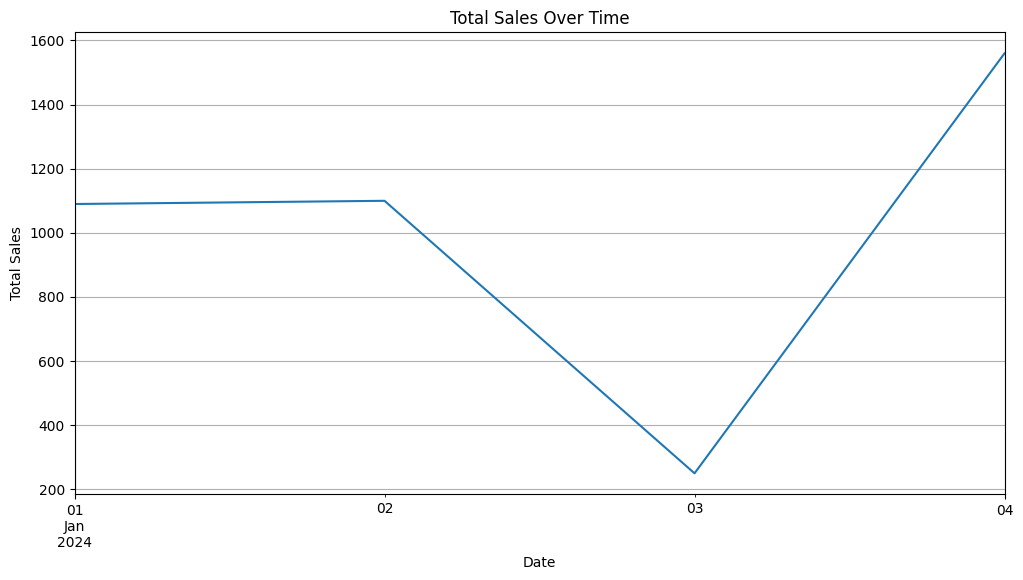

In [3]:
import matplotlib.pyplot as plt

# Aggregate sales by date
sales_by_date = df.groupby('Date')['Total_Sales'].sum()

# Plot time series of sales
plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


Customer Demographics:
                 Customer_Age
Customer_Gender              
Female                   31.0
Male                     41.0

Product Sales Analysis:
Product_Category
Electronics    3500.0
Clothing        250.0
Groceries       250.0
Name: Total_Sales, dtype: float64


/tmp/ipykernel_33/3222875172.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df[['Customer_Age', 'Customer_Gender']].groupby('Customer_Gender').mean())


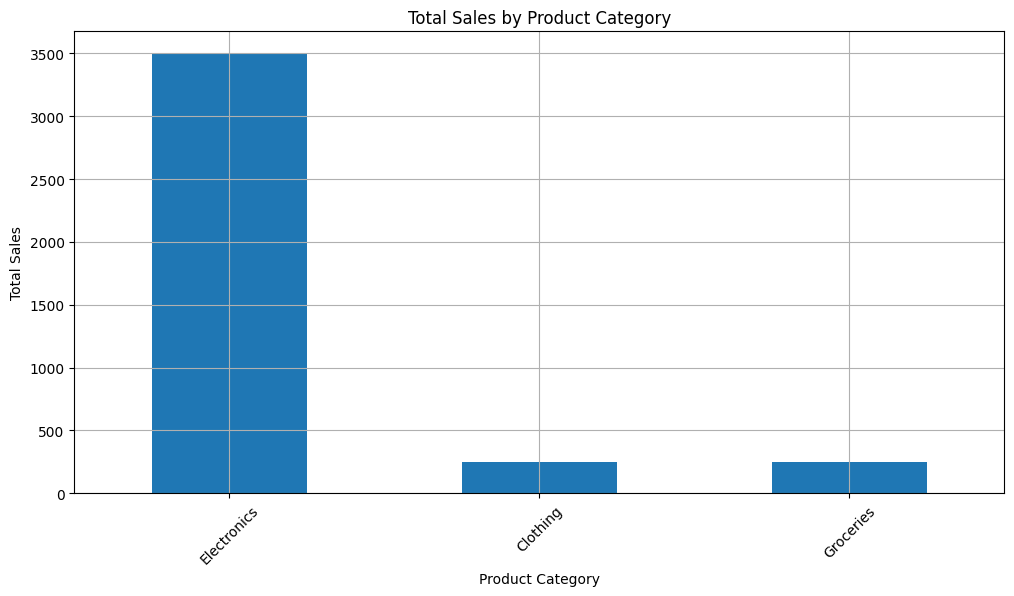

In [4]:
# Customer demographics
print("\nCustomer Demographics:")
print(df[['Customer_Age', 'Customer_Gender']].groupby('Customer_Gender').mean())

# Product sales analysis
product_sales = df.groupby('Product_Category')['Total_Sales'].sum().sort_values(ascending=False)

print("\nProduct Sales Analysis:")
print(product_sales)

# Plot sales by product category
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipykernel_33/3640187319.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_sales = df.groupby('Payment_Method')['Total_Sales'].sum().sort_values(ascending=False)


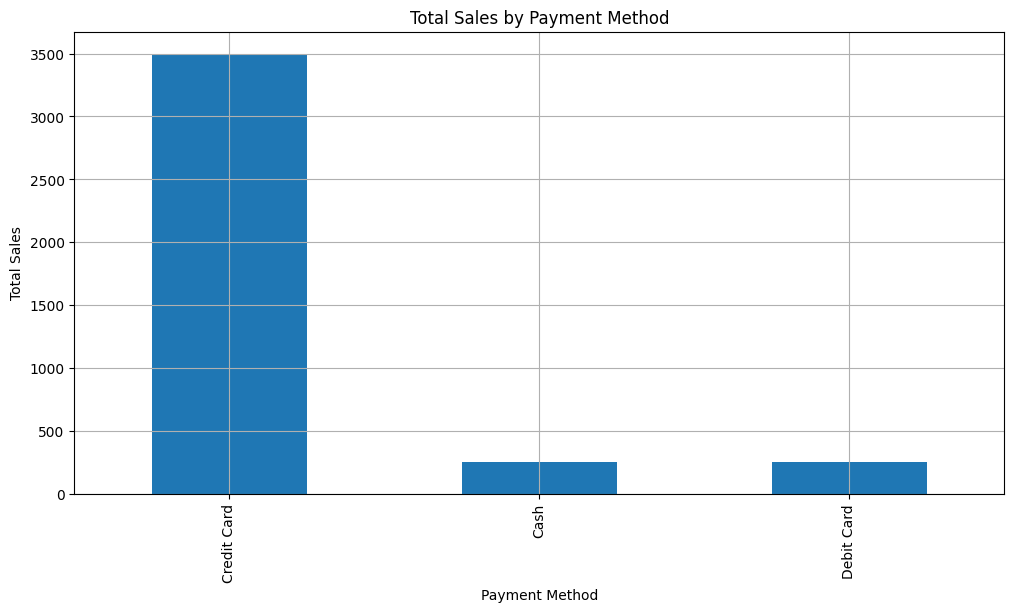

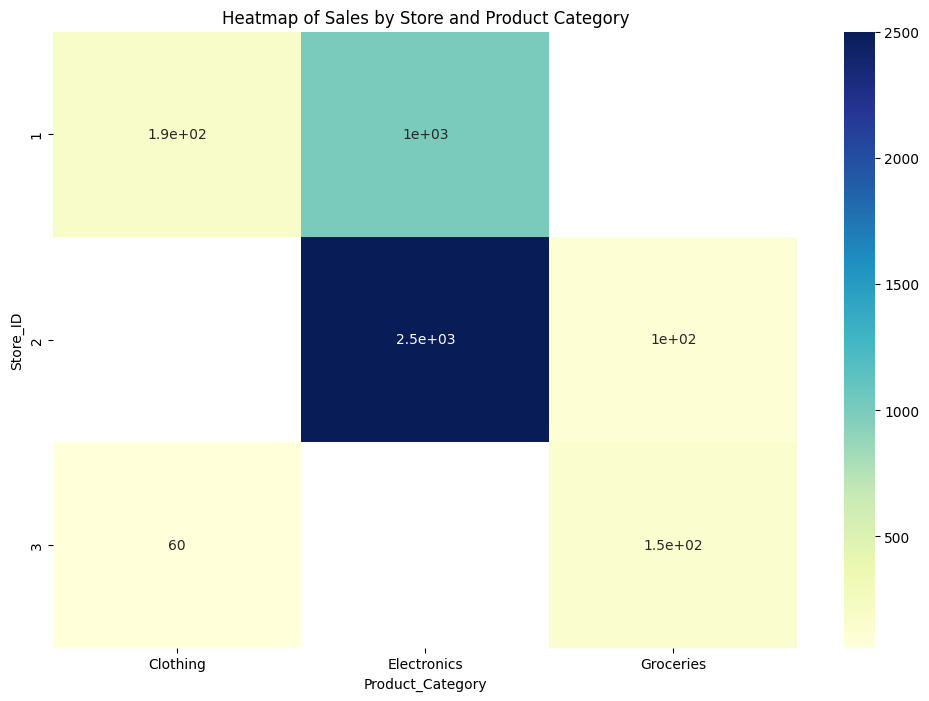

In [5]:
import seaborn as sns

# Sales by Payment Method
payment_sales = df.groupby('Payment_Method')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
payment_sales.plot(kind='bar')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Heatmap of sales by store and product category
sales_pivot = df.pivot_table(index='Store_ID', columns='Product_Category', values='Total_Sales', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Sales by Store and Product Category')
plt.show()

In [6]:
# Recommendations based on insights
print("\nRecommendations:")
if mean_sales > 500:
    print("The average sales are quite high, consider analyzing which products or stores contribute the most.")
else:
    print("Sales are lower than average, consider strategies to increase sales such as promotions or expanding the product range.")

if df['Customer_Gender'].value_counts().idxmax() == 'Female':
    print("Consider targeting marketing strategies more towards female customers as they seem to be the primary purchasers.")

if df['Product_Category'].value_counts().idxmax() == 'Electronics':
    print("Electronics is the top-selling category. Focus on optimizing the supply chain and promotions for electronics.")


Recommendations:
Sales are lower than average, consider strategies to increase sales such as promotions or expanding the product range.
Consider targeting marketing strategies more towards female customers as they seem to be the primary purchasers.
Electronics is the top-selling category. Focus on optimizing the supply chain and promotions for electronics.
